# Assignment 2 - Kmeans

**Goal**

- Develop our version of K-Means.
- To compare the performance of different clustering algorithms.
- Demonstrate understanding of algorithms like K-Means, DBSCAN, and Hierarchical.
- Extend the functionality of the developed K-Means with additional parameters.
  
**Reference**

- Chicago Taxi Data - https://drive.google.com/file/d/1dQH8MlyQlHDwJ3lWtAqhjkCDIpT9VfYU/view - an approximately week-long subset of the full dataset ( full dataset - https://data.cityofchicago.org/Transportation/Taxi-Trips-2013-2023-/wrvz-psew/data)
- Mopsi Data subset - https://cs.uef.fi/sipu/datasets/MopsiLocationsUntil2012-Finland.txt
- For KMeans understanding - https://medium.com/@avijit.bhattacharjee1996/implementing-k-means-clustering-from-scratch-in-python-a277c23563ac


In [1]:
#importing required libraries that are used in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram

from KMeans_my import KMeans_my

## My KMeans Performance and its Comparison with sklearn KMeans

In [2]:
#Test on an simple input provided in Assignment PDF

X = np.array([[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]])
Kmeans_my = KMeans_my(k=2)
Kmeans_my.fit(X)

(array([0, 0, 0, 0, 1, 1, 1, 1]),
 array([[1., 1.],
        [9., 9.]]))

In [3]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4,cluster_std=0.60, random_state=0)

In [4]:
df = pd.DataFrame(X)
df.columns = ['col1','col2']
df

,col1,col2
0,-0.841778,7.866552
1,-1.215153,8.014846
2,1.843208,-0.072221
3,-1.352334,7.529442
4,1.773949,-0.423201
...,...,...
695,-1.353432,3.165605
696,-0.973870,8.412865
697,-1.831415,2.286754
698,-1.846398,3.304915


In [5]:
#Calling My KMeans
Kmeans_my = KMeans_my(k=4)
Kmeans_my.fit(X)

(array([0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 1, 3, 0, 3, 2, 1, 1, 0, 3, 0, 3, 3,
        2, 3, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 3, 0, 0, 3, 3, 1, 1, 3, 3, 2,
        3, 0, 0, 1, 0, 3, 1, 0, 1, 1, 1, 2, 3, 0, 1, 3, 2, 3, 2, 2, 0, 1,
        3, 2, 3, 3, 0, 3, 0, 0, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 3, 0, 1, 2,
        1, 2, 0, 0, 1, 0, 0, 0, 2, 3, 0, 0, 0, 3, 2, 2, 3, 3, 3, 1, 1, 2,
        3, 1, 1, 3, 1, 1, 0, 0, 2, 2, 1, 3, 2, 0, 2, 0, 0, 2, 3, 0, 1, 0,
        2, 3, 1, 0, 0, 2, 1, 1, 2, 1, 3, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 3,
        1, 0, 0, 3, 1, 2, 0, 1, 1, 2, 0, 0, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3,
        1, 3, 1, 1, 3, 0, 2, 0, 3, 2, 2, 2, 2, 3, 2, 0, 3, 1, 1, 0, 2, 2,
        2, 1, 3, 3, 3, 0, 1, 1, 2, 2, 3, 0, 3, 0, 2, 0, 1, 1, 1, 0, 3, 3,
        1, 0, 3, 0, 0, 2, 1, 3, 3, 1, 0, 0, 0, 0, 1, 2, 0, 3, 3, 0, 1, 0,
        0, 1, 1, 3, 3, 1, 3, 2, 2, 2, 0, 3, 2, 1, 0, 1, 0, 0, 0, 2, 1, 2,
        2, 0, 0, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 0, 1, 3, 3, 3, 1, 0, 1, 1,
        3, 0, 0, 3, 3, 2, 3, 3, 0, 1, 

In [6]:
#Calling sklearn Kmeans
kmeans_sklearn = KMeans(n_clusters=4, init='k-means++')
kmeans_sklearn.fit(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

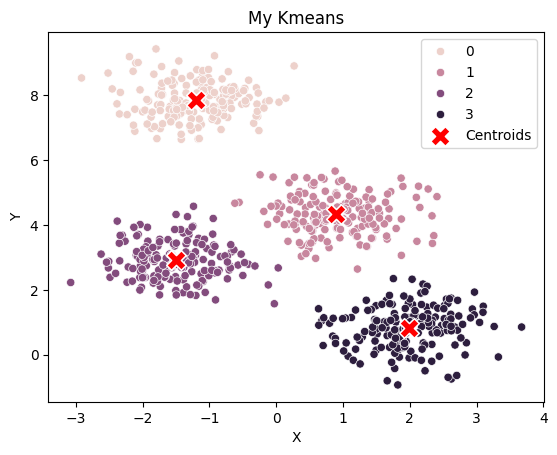

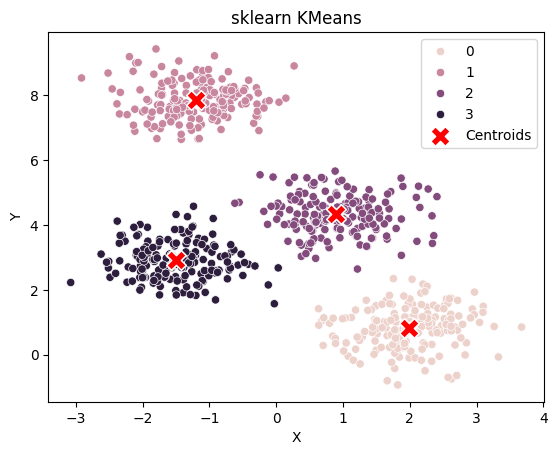

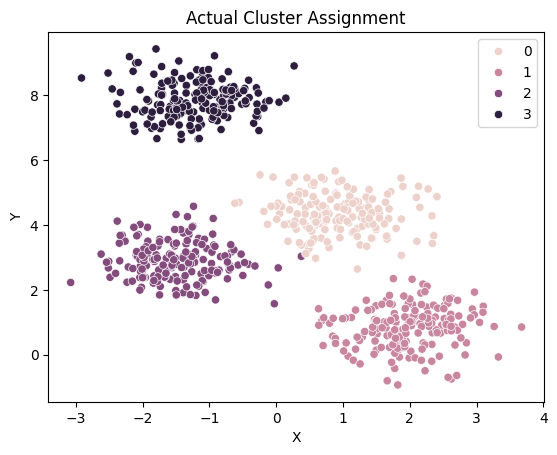

In [7]:
sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=Kmeans_my.labels_)

centroids = Kmeans_my.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title('My Kmeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=kmeans_sklearn.labels_)

centroids = kmeans_sklearn.cluster_centers_
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title('sklearn KMeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

sns.scatterplot(data=df, x=df.col1, y=df.col2, hue=cluster_assignments)

plt.title('Actual Cluster Assignment')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [8]:
randscore_my = adjusted_rand_score(cluster_assignments, Kmeans_my.labels_)
randscore_sklearn = adjusted_rand_score(cluster_assignments, kmeans_sklearn.labels_)
print("Adjusted Rand Index (sklearn KMeans vs. Expected):", randscore_sklearn)
print("Adjusted Rand Index (My KMeans vs. Expected):", randscore_my)

Adjusted Rand Index (sklearn KMeans vs. Expected): 0.9961850080391301
Adjusted Rand Index (My KMeans vs. Expected): 0.9961850080391301


## Run different clustering algorithms on given datasets

**What are we trying to achieve from this?**

- The reason why you chose the clustering algorithm(s)
- Any pre-processing of the data or any hyperparameter settings
- Output from the algorithm(s) -- show what clusters were generated
- The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?

### Analysing Chicago Taxi Data with different clustering algorithms

In [9]:
df_taxi = pd.read_csv('Taxi_Trips__2013-2023_.csv')
# only taking pickup data from dataset for clustering
df_taxi = df_taxi[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
df_taxi

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308
101786,41.980264,-87.913625


In [10]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


In [11]:
df_taxi.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude
count,95657.000000,95657.000000
mean,41.898703,-87.689956
std,0.064621,0.104274
min,41.660136,-87.913625
25%,41.878866,-87.695013
50%,41.895033,-87.642649
75%,41.949829,-87.626211
max,42.015934,-87.534903


In [12]:
#droping NaN columns for clustering
df_taxi = df_taxi.dropna().reset_index(drop=True)
df_taxi

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
95652,41.878866,-87.625192
95653,41.885281,-87.657233
95654,41.899602,-87.633308
95655,41.899602,-87.633308


In [13]:
df_taxi.isna().sum() #Check for Empty after droping NaN

Pickup Centroid Latitude     0
Pickup Centroid Longitude    0
dtype: int64

In [14]:
scaler = StandardScaler()
df_taxi_scaled = scaler.fit_transform(df_taxi)

In [15]:
kmeans_taxi = KMeans(n_clusters=4, init='k-means++')
kmeans_taxi.fit(df_taxi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Pickup Centroid Latitude'>

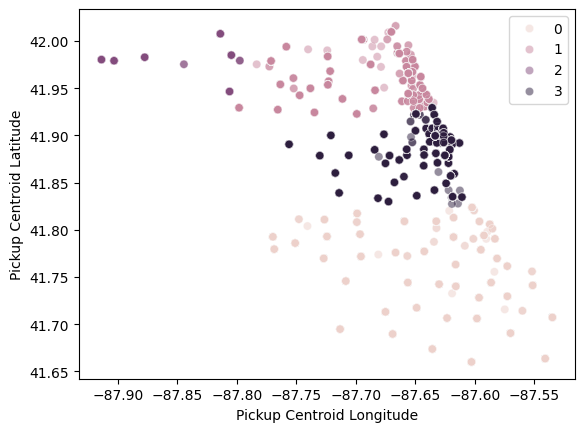

In [16]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , hue=kmeans_taxi.labels_, alpha = 0.5)

In [17]:
kmeans_taxi.inertia_

17723.413073497228

In [18]:
kminertia = pd.DataFrame(data=[], index=range(2,14), columns=['inertia'])

for k in range(2,14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_taxi_scaled)
    kminertia.loc[k] = kmeans.inertia_

kminertia

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

,inertia
2,73910.819486
3,33720.966698
4,17723.413073
5,12608.698886
6,9679.24943
7,8068.864112
8,6707.321185
9,5731.020978
10,4903.601423
11,4124.177519


<Axes: >

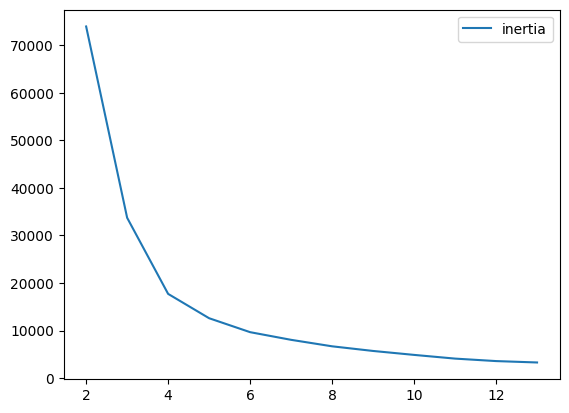

In [19]:
kminertia.plot()

In [20]:
#Observation - 

#Using elbow method k=5 or k=6 would be best number of clusters for given data.

In [21]:
kmeans_taxi2 = KMeans(n_clusters=6, init='k-means++')
kmeans_taxi2.fit(df_taxi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Pickup Centroid Latitude'>

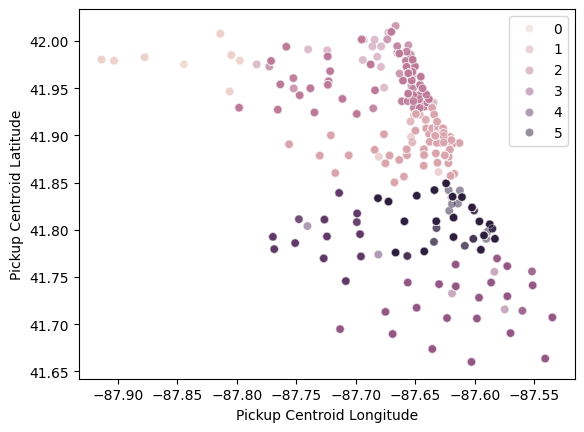

In [22]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , hue=kmeans_taxi2.labels_, alpha = 0.5)

In [23]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(df_taxi_scaled)
dbscan_clusters = dbscan.labels_
np.unique(dbscan_clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Pickup Centroid Latitude'>

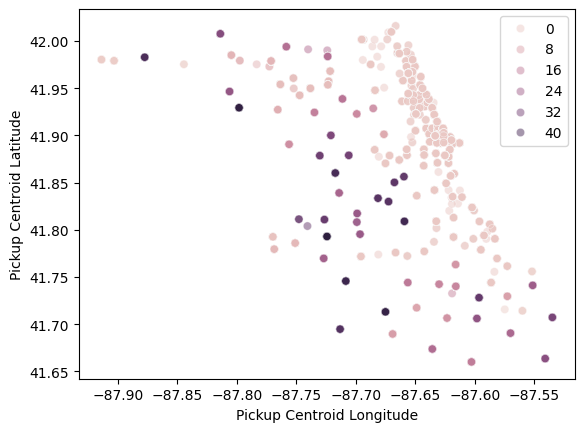

In [24]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , hue=dbscan.labels_, alpha = 0.5)

In [25]:
# testing for different eps and min_samples
dbscan2 = DBSCAN(eps=0.1, min_samples=10)
dbscan2.fit(df_taxi_scaled)
dbscan_clusters2 = dbscan2.labels_
np.unique(dbscan_clusters2)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85])

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Pickup Centroid Latitude'>

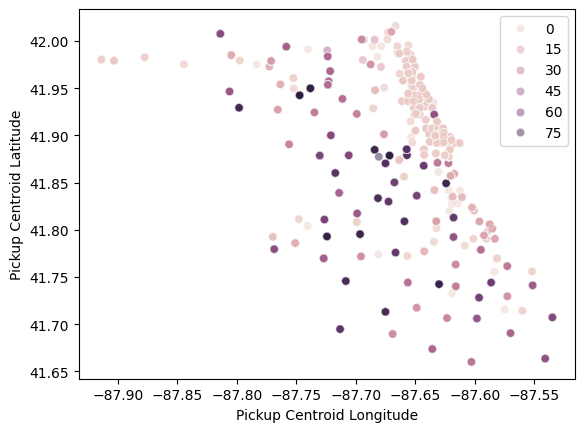

In [26]:
sns.scatterplot(data=df_taxi, x=df_taxi['Pickup Centroid Longitude'], y=df_taxi['Pickup Centroid Latitude'] , hue=dbscan2.labels_, alpha = 0.5)

In [27]:
#Hirarchical Clustering
#from scipy.cluster.hierarchy import linkage, dendrogram

#plt.figure(figsize=(50,5))
#dend = dendrogram(linkage(df_taxi_scaled, method='ward'))
#plt.show()

In [28]:
#from sklearn.cluster import AgglomerativeClustering

#hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
#labels = hierarchical_cluster.fit_predict(df_taxi_scaled)

#sns.scatterplot(data = df_mopsi, x =df_taxi.x, y = df_taxi.y, hue=labels, alpha = 0.5)

#### Note / Observation about Hirarchical clustering
I tried running Hierarchical clustering but it gave following error
- The kernel for kmeans-VishalDani1602/Assignment 2 - Clustering.ipynb appears to have died. It will restart automatically.
- My Observation from this is maybe due to data being large Hierarchical clustering is not a way to go as each point tries to find distance from all other points.

#### Observation from different Clustering Algorithms on Taxi Data

- a

### Analysing Mopsi Data with different clustering algorithms

In [29]:
df_mopsi = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', delimiter='\t', header=None)
df_mopsi.columns = ["x", "y"]

In [30]:
df_mopsi

,x,y
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [31]:
df_mopsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       13467 non-null  int64
 1   y       13467 non-null  int64
dtypes: int64(2)
memory usage: 210.6 KB


In [32]:
df_mopsi.describe()

,x,y
count,13467.000000,13467.000000
mean,625094.775897,289004.669043
std,7844.331518,20399.428325
min,599247.000000,212016.000000
25%,625930.000000,296164.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.500000
max,697835.000000,314328.000000


<Axes: xlabel='x', ylabel='y'>

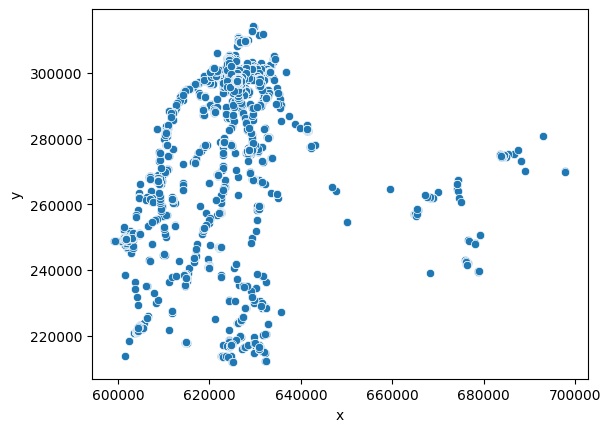

In [33]:
sns.scatterplot(data = df_mopsi, x = df_mopsi.x, y = df_mopsi.y)

In [34]:
df_mopsi_scaled = scaler.fit_transform(df_mopsi)

In [35]:
kmeans_mopsi = KMeans(n_clusters=4, init='k-means++')
kmeans_mopsi.fit(df_mopsi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

<Axes: xlabel='x', ylabel='y'>

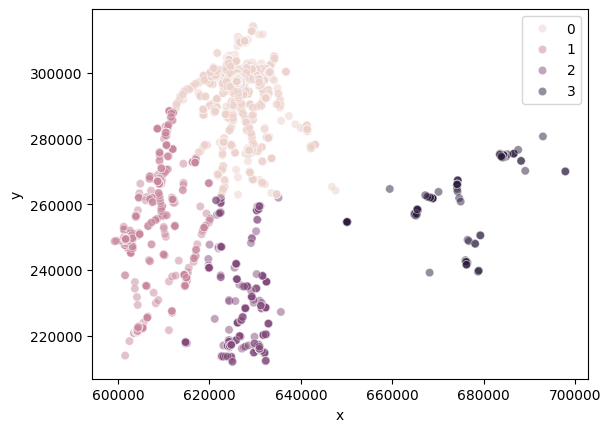

In [36]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.x, y = df_mopsi.y,  hue=kmeans_mopsi.labels_, alpha = 0.5)

In [37]:
kmeans_mopsi.inertia_

4428.809480662807

In [38]:
kminertia_mopsi = pd.DataFrame(data=[], index=range(2,14), columns=['inertia'])

for k in range(2,14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_mopsi_scaled)
    kminertia_mopsi.loc[k] = kmeans.inertia_

kminertia_mopsi

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

,inertia
2,11542.15471
3,7143.914646
4,4428.809481
5,3509.319888
6,2765.442559
7,2234.900205
8,1694.265354
9,1366.675678
10,1151.443768
11,958.508886


<Axes: >

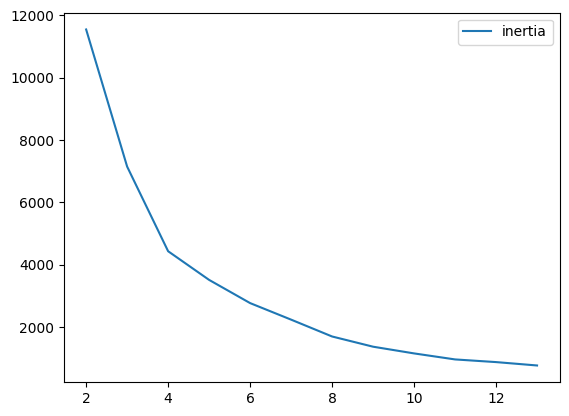

In [39]:
kminertia_mopsi.plot()

In [40]:
#Observation - 

#Using elbow method k=6 or k=8 would be best number of clusters for given data.

In [41]:
kmeans_mopsi2 = KMeans(n_clusters=6, init='k-means++')
kmeans_mopsi2.fit(df_mopsi_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

<Axes: xlabel='x', ylabel='y'>

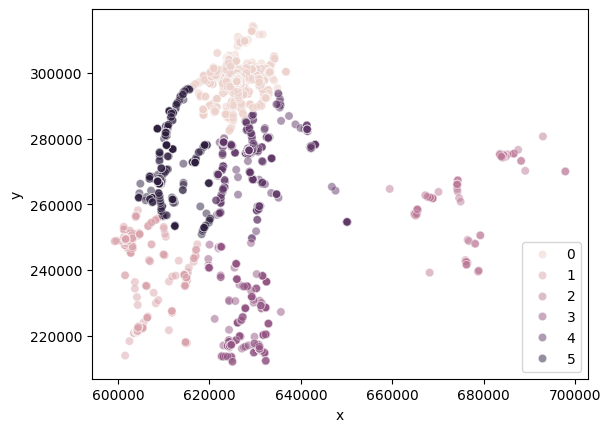

In [42]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.x, y = df_mopsi.y,  hue=kmeans_mopsi2.labels_, alpha = 0.5)

In [43]:
# DBSCAN clustering
dbscan_mopsi = DBSCAN(eps=0.3, min_samples=5)
dbscan_mopsi.fit(df_mopsi_scaled)
dbscan_mopsi_clusters = dbscan_mopsi.labels_
np.unique(dbscan_mopsi_clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

<Axes: xlabel='x', ylabel='y'>

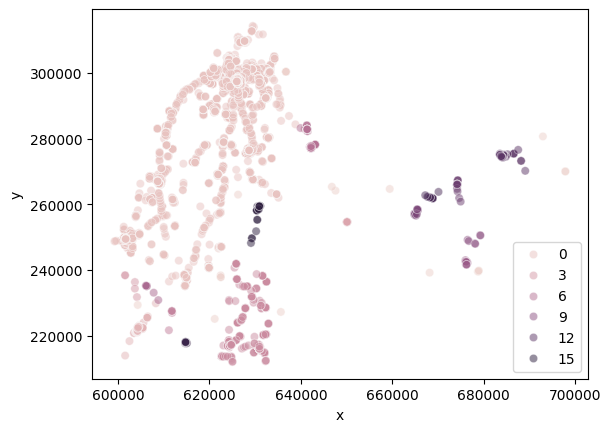

In [44]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.x, y = df_mopsi.y,  hue=dbscan_mopsi.labels_, alpha = 0.5)

In [45]:
# DBSCAN clustering with different eps
dbscan_mopsi2 = DBSCAN(eps=0.5, min_samples=10)
dbscan_mopsi2.fit(df_mopsi_scaled)
dbscan_mopsi_clusters2 = dbscan_mopsi.labels_
np.unique(dbscan_mopsi_clusters2)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

<Axes: xlabel='x', ylabel='y'>

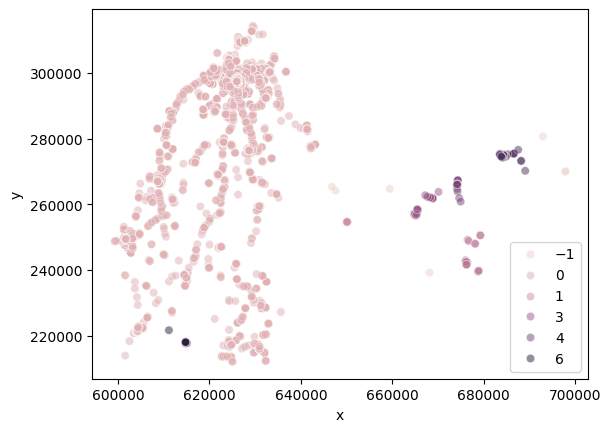

In [46]:
sns.scatterplot(data = df_mopsi,x = df_mopsi.x, y = df_mopsi.y,  hue=dbscan_mopsi2.labels_, alpha = 0.5)

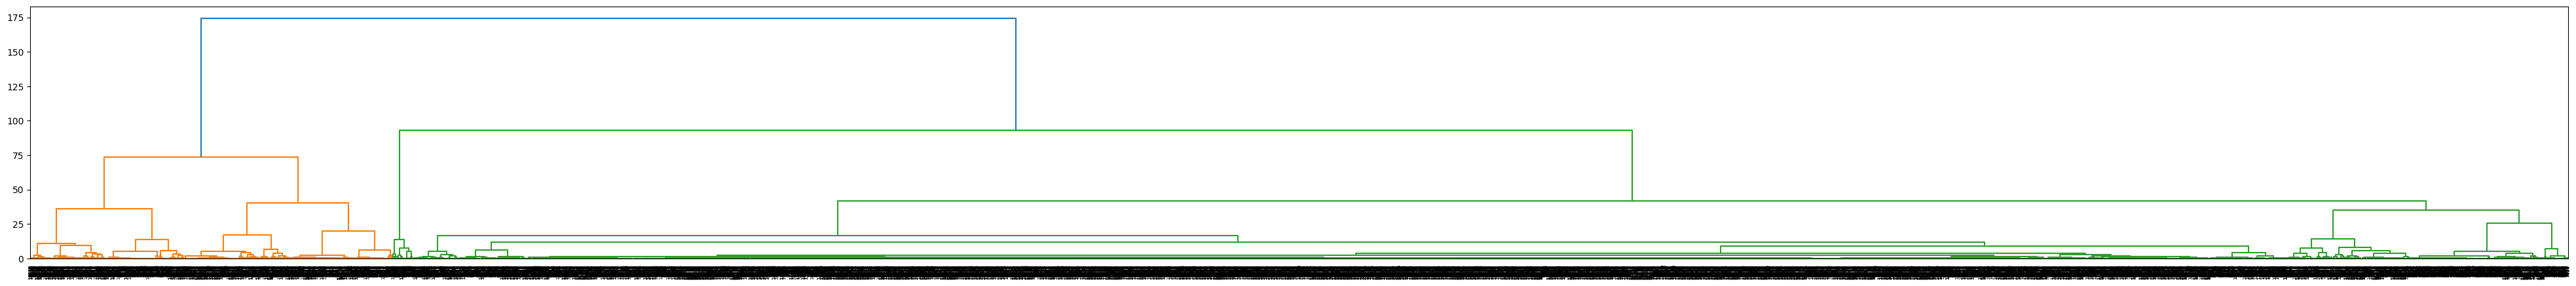

In [47]:
plt.figure(figsize=(50,5))
dend = dendrogram(linkage(df_mopsi_scaled, method='ward'))
plt.show()

<Axes: xlabel='x', ylabel='y'>

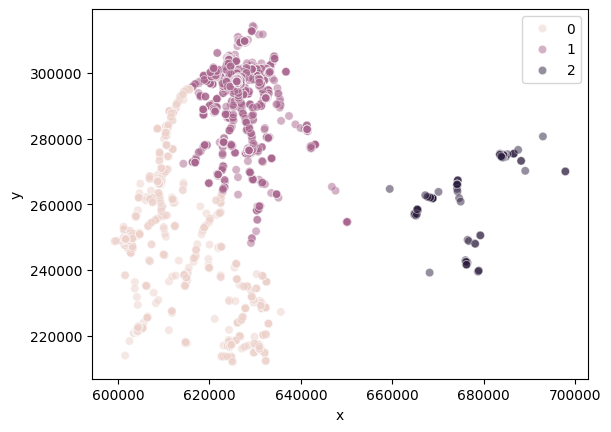

In [51]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_mopsi_scaled)

sns.scatterplot(data = df_mopsi, x =df_mopsi.x, y = df_mopsi.y, hue=labels, alpha = 0.5)

## Extended KMeans Analysis
- Have balanced parameter, so that clusters have equal amount of points.